<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#基本概念" data-toc-modified-id="基本概念-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>基本概念</a></span></li><li><span><a href="#案例" data-toc-modified-id="案例-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>案例</a></span><ul class="toc-item"><li><span><a href="#Apriori-算法实例" data-toc-modified-id="Apriori-算法实例-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Apriori 算法实例</a></span></li><li><span><a href="#FP-Growth-算法" data-toc-modified-id="FP-Growth-算法-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>FP-Growth 算法</a></span></li></ul></li><li><span><a href="#总结" data-toc-modified-id="总结-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>总结</a></span></li><li><span><a href="#练习" data-toc-modified-id="练习-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>练习</a></span></li></ul></div>

## 基本概念

1. 支持度、置信度、提升度；
1. Apriori 算法的工作原理；
1. 实际工作中，如何运用关联规则挖掘。

支持度：某个商品组合出现的次数与总次数之间的比例。

置信度：在 A 发生的情形下，B 发生的概率。

提升度：A 的出现对 B 出现的概率提升量。其中：提升度 (A→B)= 置信度 (A→B)/ 支持度 (B)。
    1. 提升度 (A→B)>1：代表有提升；
    1. 提升度 (A→B)=1：代表有没有提升，也没有下降；
    1. 提升度 (A→B)<1：代表有下降。

频繁项集（frequent itemset）：支持度大于等于最小支持度（Min Support）阈值的项集，所以小于最小值支持度的项目就是非频繁项集，而大于等于最小支持度的项集就是频繁项集。
    - 支持度 ≥ 最小支持度：频繁项集；
    - 支持度 < 最小支持度：非频繁项集。
    
Apriori 算法的实质：查找频繁项集的过程。

## 案例

### Apriori 算法实例

原始数据：
<img src="https://static001.geekbang.org/resource/image/f7/1c/f7d0cc3c1a845bf790b344f62372941c.png" style="width:500px">

转换后：
<img src="https://static001.geekbang.org/resource/image/e3/33/e30fe11a21191259e6a93568461fa933.png" style="width:500px">

Apriori 算法的流程：

1. 假设最小支持度为 50%，也就是出现的概率为 0.5.
1. 计算单个件出现的概率，此时 K=1：<img src="https://static001.geekbang.org/resource/image/ff/de/fff5ba49aff930bba71c98685be4fcde.png" style="width:500px">
1. 去除概率小于最小支持度的类目，得到的结果如下：<img src="https://static001.geekbang.org/resource/image/ae/b6/ae108dc65c33e9ed9546a0d91bd881b6.png" style="width:500px">
1. 在 Step3 的基础上再重新组合，此时 K=2，得到的结果如下：<img src="https://static001.geekbang.org/resource/image/a5/a3/a51fd814ebd68304e3cb137630af3ea3.png" style="width:500px">
1. 去除概率小于最小支持度的类目，得到的结果如下：<img src="https://static001.geekbang.org/resource/image/a0/c8/a087cd1bd2a9e033105de275834b79c8.png" style="width:500px">
1. 在 Stpe5 的基础上再重新组合，此时 K=3，得到的结果如下：<img src="https://static001.geekbang.org/resource/image/a7/9c/a7f4448cc5031b1edf304c9aed94039c.png" style="width:500px">
1. 去除概率小于最小支持度的类目，得到的结果如下：<img src="https://static001.geekbang.org/resource/image/d5/0f/d51fc9137a537d8cb96fa21707cab70f.png" style="width:500px">

通过以上步骤，即可得到 K=3 的频繁项集{1,2,3}。

由此可知，Apriori 算法其实就是一个迭代过程。其中，如果得到的项集为空，则退一步，最终结果为 K-1 的项集。

### FP-Growth 算法

Apriori 算法的缺点：
 1. 候选集可能过大。因为采用排列组合方式，会把所有可能的项集都组合出来；
 1. 每次计算都需要重新扫描数据集，以此来计算项集的支持度。
 
 
FP-Growth 算法：
 1. 创建一颗 FP树来存储频繁项集，且在创建前删除不满足最小支持度的项，减少存储空间。
 1. 整个生成过程只遍历数据集 2 次，大大减少了计算量。
 
 
FP-Growth 的原理：
 1. 创建项头表（item header table）：先扫描一遍数据集，对于满足最小支持度的单个项（K=1 项集），按照支持度从高到低进行排序，删除不满足最小支持度的项。<br>项头表的作用是为 FP 构建及频繁项集挖掘提供索引。<br>项头表包括：项目、支持度、链表，链表的初始值为空。如下图：<img src="https://static001.geekbang.org/resource/image/69/f5/69ce07c61a654faafb4f5114df1557f5.png" style="width:500px"><br><br>
 1. 构造 FP 树：FP 树的根节点记为 NULL 节点。<br>再次扫描数据集，对每一条数据，按照支持度从高到低的顺序进行创建节点。节点如果存在，计数 count+1,；如果不存在，创建节点，同时更新项头表的链表。<img src="https://static001.geekbang.org/resource/image/ea/92/eadaaf6585379815e62aad99386c7992.png" style="width:500px"><br><br>
 1. 通过 FP 树挖掘频繁项集：通过项头表挖掘每个频繁项集。<br>条件模式基：以要挖掘的节点为叶子节点，自底向上求出 FP 子树，然后将 FP 子树的祖先节点设置为叶子节点之和。<br>以“啤酒”节点为例，从 FP 树中得到一颗 FP 子树，将祖先节点的支持度记为叶子节点之和，得到：<img src="https://static001.geekbang.org/resource/image/99/0f/9951cda824fc9823136231e7c8e70d0f.png" style="width:500px">

***
个人理解：

原始数据：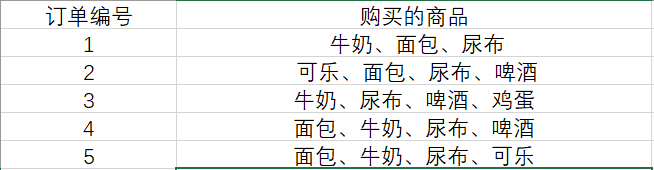
1. 创建项头表，得到结果如下：<img src="https://static001.geekbang.org/resource/image/69/f5/69ce07c61a654faafb4f5114df1557f5.png" style="width:500px"><br><br>
1. 按照项头表重新排序，结果如下：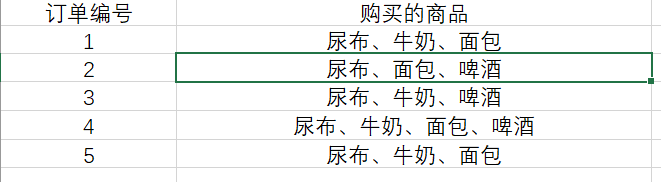<br>**注意**：在数据重排之前，已经删除小于最小支持度的数据。因此，在这个案例中，删除“鸡蛋”、“可乐”数据。<br>
1. 构造 FP 树：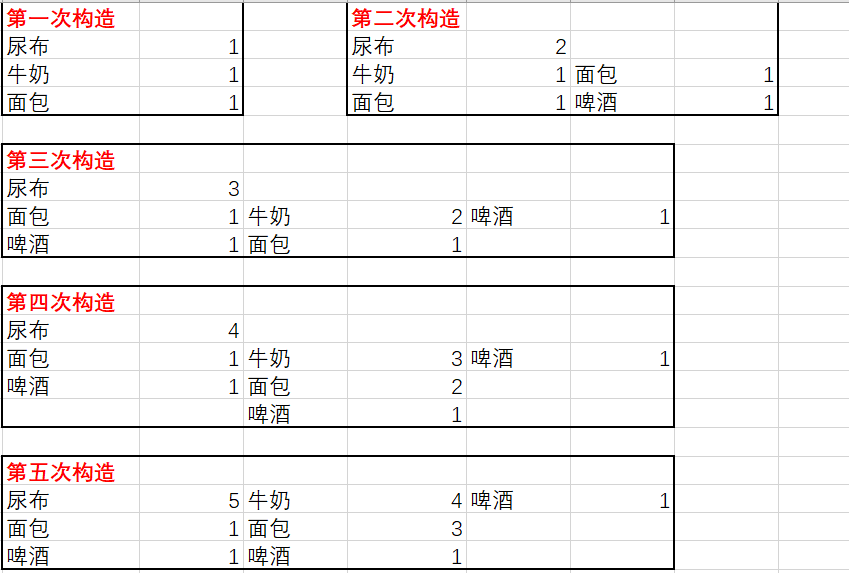
1. 通过 FP 树挖掘频繁项集：以“啤酒”为叶子节点。<br>新的数据源：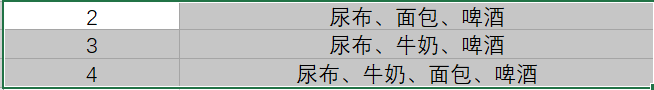<br><br>构造结果：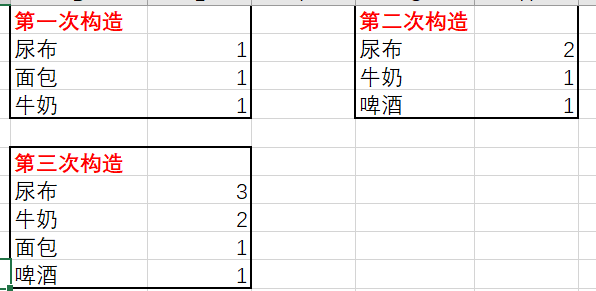

## 总结

![](https://static001.geekbang.org/resource/image/c7/35/c7aee3b17269139ed3d5a6b82cc56735.png)

## 练习

1. Apriori 算法的工作原理；
1. FP-Growth 算法相对于 Apriori 算法有何改进？

Apriori 算法的原理：不断迭代，得到大于最小支持度的项目。

FP-Growth 算法：
    1. 只需要运行两遍，减少计算量，便于检索；
    1. 创建 FP 树存储数据，节省存储空间。